# Modélisation

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
import shap

### Chargement

In [3]:
# Charger le jeu de données dans un DataFrame pandas
df = pd.read_csv('spotify.csv')

In [4]:
pd.options.display.max_columns = 150

In [5]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'album_name', 'album_id', 'track_name',
       'track_id', 'popularity', 'release_date', 'duration_ms', 'explicit',
       'external_urls', 'is_local', 'preview_url', 'track_number', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms.1',
       'time_signature'],
      dtype='object')

In [6]:
df.head(1)

,Unnamed: 0,artist_name,album_name,album_id,track_name,track_id,popularity,release_date,duration_ms,explicit,external_urls,is_local,preview_url,track_number,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
0,0,Gen Hoshino,Comedy,41ERrwfzos93Xlf6hFBiDn,Comedy,5SuOikwiRyPMVoIQDJUgSV,66,2022-04-08,230666,False,https://open.spotify.com/track/5SuOikwiRyPMVoI...,False,https://p.scdn.co/mp3-preview/56ee6d51af5c3a28...,1,acoustic,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,audio_features,5SuOikwiRyPMVoIQDJUgSV,spotify:track:5SuOikwiRyPMVoIQDJUgSV,https://api.spotify.com/v1/tracks/5SuOikwiRyPM...,https://api.spotify.com/v1/audio-analysis/5SuO...,230667,4


In [7]:
# drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'artist_name', 'album_name', 'album_id', 'track_name',
       'track_id',  'release_date', 'explicit',  'external_urls', 'is_local', 
       'preview_url', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms.1'])  # axis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110158 entries, 0 to 110157
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        110158 non-null  int64  
 1   duration_ms       110158 non-null  int64  
 2   track_number      110158 non-null  int64  
 3   genre             110158 non-null  object 
 4   danceability      110158 non-null  float64
 5   energy            110158 non-null  float64
 6   key               110158 non-null  int64  
 7   loudness          110158 non-null  float64
 8   mode              110158 non-null  int64  
 9   speechiness       110158 non-null  float64
 10  acousticness      110158 non-null  float64
 11  instrumentalness  110158 non-null  float64
 12  liveness          110158 non-null  float64
 13  valence           110158 non-null  float64
 14  tempo             110158 non-null  float64
 15  time_signature    110158 non-null  int64  
dtypes: float64(9), int64

### Train Test Split

In [9]:
# Separation des variables et de la cible
X = df.drop('popularity', axis=1)
y = df['popularity']

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)

In [11]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (88126, 15)
Test set: (22032, 15)


In [12]:
X.columns

Index(['duration_ms', 'track_number', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

### Pipeline

In [13]:
# Séparation des colonnes numériques et catégorielles
cat_col = ['genre']
num_col = ['track_number', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature' ]

In [60]:
# Création de pipelines
num_pipeline = StandardScaler()
cat_pipeline = OneHotEncoder()

In [61]:
# Création d'un Préprocessor pour appliquer les pipelines crées pour les transfomations sur les colonnes
preprocessing = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing = make_pipeline(preprocessing, PolynomialFeatures())

### Regression Linéaire

In [63]:
# Modèle de Regression Linéaire


model_lr = make_pipeline(preprocessing, LinearRegression())

model_lr.fit(X_train,y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['track_number',
                                                                    'danceability',
                                                                    'energy',
                                                                    'key',
                                                                    'loudness',
                                                                    'mode',
                                                                    'speechiness',
                                                                    'acousticness',
                                                                    'instrumentalness',
                                                                    'liveness',
                                                                    'valence',
                                                                    'tempo',
                                                                    'duration_ms',
                                                                    'time_signature']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   ['genre'])])),
                                 ('polynomialfeatures',
                                  PolynomialFeatures())])),
                ('linearregression', LinearRegression())])

In [66]:
# Accéder à l'étape de mise à l'échelle à l'aide de named_steps
linear = model_lr[-1]

In [68]:
print(type(linear))

<class 'sklearn.linear_model._base.LinearRegression'>


In [17]:
model_lr.score(X_train, y_train)

0.7449751792020314

In [18]:
y_pred = model_lr.predict(X_train)

In [19]:
# Calcul du R²
r2 = r2_score(y_train, y_pred)
print("R² : %.2f" % r2)

R² : 0.74


In [20]:
# Calcul du MAE
mae = mean_absolute_error(y_train, y_pred)
print("MAE : %.2f" % mae)

MAE : 7.08


### Elastic Net (Lasso/Ridge)


In [21]:
# Définir les hyperparamètres à tester avec le grid search
elastic_net = ElasticNet()
pipe_el = make_pipeline(preprocessing, elastic_net)

pipe_el.get_params()



{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('pipeline-1',
                                                     Pipeline(steps=[('standardscaler',
                                                                      StandardScaler())]),
                                                     ['track_number',
                                                      'danceability', 'energy',
                                                      'key', 'loudness', 'mode',
                                                      'speechiness',
                                                      'acousticness',
                                                      'instrumentalness',
                                                      'liveness', 'valence',
                                                      'tempo', 'duration_ms',
                                                      'time_signature']),
  

In [22]:
# param_grid = {"elasticnet__alpha": np.linspace(0.001,1000, 1000),
#               "elasticnet__l1_ratio": [1]}
# clf = RandomizedSearchCV(pipe_el, param_grid, random_state=42 , n_iter=500, cv=5)

# clf.fit(X_train, y_train)


In [23]:
# clf.best_score_

In [24]:
# clf.best_params_

In [25]:
# # Créer un objet GridSearchCV pour effectuer la recherche de hyperparamètres
param_grid = {"elasticnet__alpha": np.linspace(5,9, 100),
              "elasticnet__l1_ratio": [1]}
grid_search = GridSearchCV(pipe_el, param_grid, cv=5, scoring="r2", return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('pipeline-1',
                                                                                          Pipeline(steps=[('standardscaler',
                                                                                                           StandardScaler())]),
                                                                                          ['track_number',
                                                                                           'danceability',
                                                                                           'energy',
                                                                                           'key',
                                                                                           'loudness',
                                                                                           'mode',
                                                                                           'speechiness',
                                                                                           'acousticness',
                                                                                           'instrumentalness',
                                                                                           'liveness',
                                                                                           'valence',
                                                                                           'tempo',
                                                                                           'duration_ms',
                                                                                           't...
       7.82828283, 7.86868687, 7.90909091, 7.94949495, 7.98989899,
       8.03030303, 8.07070707, 8.11111111, 8.15151515, 8.19191919,
       8.23232323, 8.27272727, 8.31313131, 8.35353535, 8.39393939,
       8.43434343, 8.47474747, 8.51515152, 8.55555556, 8.5959596 ,
       8.63636364, 8.67676768, 8.71717172, 8.75757576, 8.7979798 ,
       8.83838384, 8.87878788, 8.91919192, 8.95959596, 9.        ]),
                         'elasticnet__l1_ratio': [1]},
             return_train_score=True, scoring='r2')

In [26]:
grid_search.best_params_

{'elasticnet__alpha': 5.0, 'elasticnet__l1_ratio': 1}

In [27]:
grid_search.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['track_number',
                                                                    'danceability',
                                                                    'energy',
                                                                    'key',
                                                                    'loudness',
                                                                    'mode',
                                                                    'speechiness',
                                                                    'acousticness',
                                                                    'instrumentalness',
                                                                    'liveness',
                                                                    'valence',
                                                                    'tempo',
                                                                    'duration_ms',
                                                                    'time_signature']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['genre'])])),
                                 ('polynomialfeatures',
                                  PolynomialFeatures())])),
                ('elasticnet', ElasticNet(alpha=5.0, l1_ratio=1))])

In [28]:
best_pipe_el = grid_search.best_estimator_

In [29]:
grid_search.best_score_

0.013338119640997959

In [30]:
# Modèle Elastic Net

model_elastic = make_pipeline(preprocessing, ElasticNet())


model_elastic.fit(X_train, y_train)



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['track_number',
                                                                    'danceability',
                                                                    'energy',
                                                                    'key',
                                                                    'loudness',
                                                                    'mode',
                                                                    'speechiness',
                                                                    'acousticness',
                                                                    'instrumentalness',
                                                                    'liveness',
                                                                    'valence',
                                                                    'tempo',
                                                                    'duration_ms',
                                                                    'time_signature']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['genre'])])),
                                 ('polynomialfeatures',
                                  PolynomialFeatures())])),
                ('elasticnet', ElasticNet())])

In [31]:
model_elastic.score(X_train, y_train)

0.1729332758499207

In [32]:
y_pred_el = model_elastic.predict(X_train)

In [33]:
# Calcul du R²
r2 = r2_score(y_train, y_pred_el)
print("R² : %.2f" % r2)

R² : 0.17


In [34]:
# Calcul du MAE
mae = mean_absolute_error(y_train, y_pred_el)
print("MAE : %.2f" % mae)

MAE : 13.79


### XGBRegressor

In [49]:
# Définition de la grille de paramètres
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [52]:
xgbr = make_pipeline(preprocessing, XGBRegressor())

xgbr.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['track_number',
                                                                    'danceability',
                                                                    'energy',
                                                                    'key',
                                                                    'loudness',
                                                                    'mode',
                                                                    'speechiness',
                                                                    'acousticness',
                                                                    'instrumentalness',
                                                                    'liveness',
                                                                    'valence',
                                                                    'tempo',
                                                                    'duration_ms',
                                                                    'time_signature']),
                                                                  ('pipeline-...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [37]:
xgbr.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['track_number',
                                                                    'danceability',
                                                                    'energy',
                                                                    'key',
                                                                    'loudness',
                                                                    'mode',
                                                                    'speechiness',
                               

In [38]:
# # Recherche de grille
# grid_search = GridSearchCV(xgbr, params, cv=5)
# grid_search.fit(X_train, y_train)

In [39]:
# # Récupération des meilleurs paramètres et du score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Meilleurs paramètres: {best_params}")
# print(f"Meilleur score: {best_score}")

In [40]:
xgbr.score(X_train, y_train)

0.7889208902812954

In [ ]:
xgbr.score(X_test, y_test)

In [41]:
y_pred_2 = xgbr.predict(X_train)

In [42]:
# Calcul du R²
r2 = r2_score(y_train, y_pred_2)
print("R² : %.2f" % r2)

R² : 0.79


In [43]:
# Calcul du MAE
mae = mean_absolute_error(y_train, y_pred_2)
print("MAE : %.2f" % mae)

MAE : 6.49


### Courbe d'apprentissage

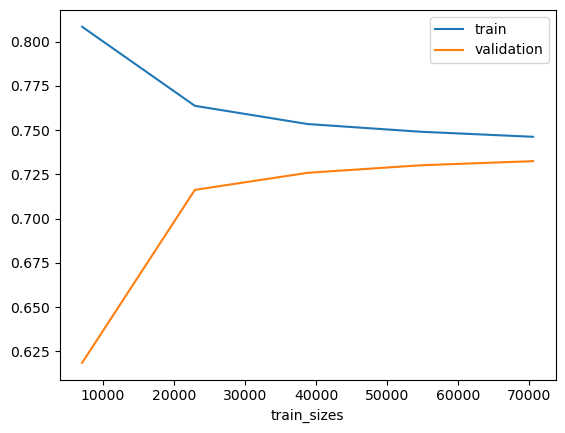

In [44]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model_lr,X_train,y_train,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()



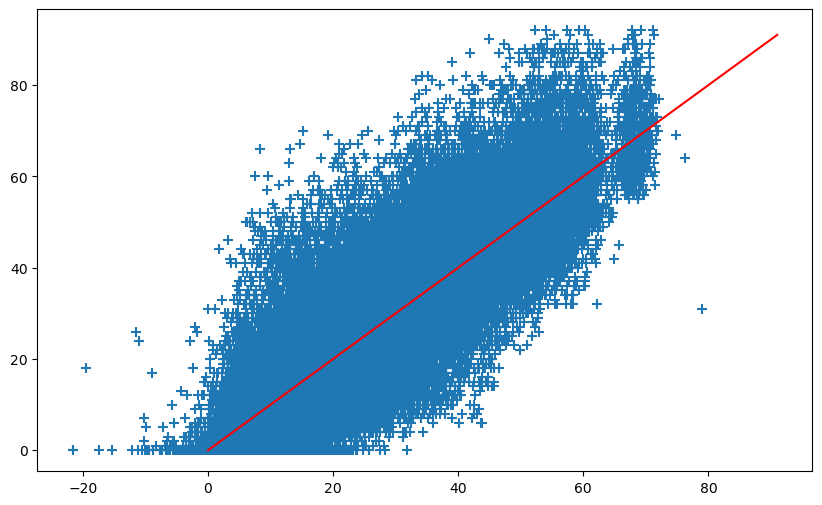

In [47]:
plt.subplots(figsize=(10, 6))
plt.scatter(y_pred,y_train,marker="+",s=50, label="nuage de points representant les données")
plt.plot(np.arange(max(y_test.values)), np.arange(max(y_test.values)), '-', color='r', label="droite de regression linéaire")
plt.show()


### SHAP

In [78]:
model_lr

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   ['track_number',
                                                                    'danceability',
                                                                    'energy',
                                                                    'key',
                                                                    'loudness',
                                                                    'mode',
                                                                    'speechiness',
                                                                    'acousticness',
                                                                    'instrumentalness',
                                                                    'liveness',
                                                                    'valence',
                                                                    'tempo',
                                                                    'duration_ms',
                                                                    'time_signature']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(),
                                                                   ['genre'])])),
                                 ('polynomialfeatures',
                                  PolynomialFeatures())])),
                ('linearregression', LinearRegression())])

In [89]:
def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=X.columns)
    return model_lr.predict_proba(data_asframe)

In [91]:
# Création d'un explainer SHAP pour le modèle entraîné
explainer = shap.KernelExplainer(model_predict, X_train, link="logit")

Provided model function fails when applied to the provided data set.


AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [86]:
# Génération des valeurs SHAP pour les données de test
shap_values = explainer(X_test)

AttributeError: 'Kernel' object has no attribute 'masker'

In [ ]:
# Visualisation de l'importance des caractéristiques
shap.summary_plot(shap_values, X_test)

In [95]:
importance_scores = xgbr.named_steps['xgbregressor'].feature_importances_
categorical_features = ['genre']
feature_names = list(num_col) + list(preprocessing.named_transformers_['cat'].get_feature_names_out(categorical_features))
genre_columns = [col for col in feature_names if col.startswith('genre_')]
genre_importances = [importance_scores[feature_names.index(col)] for col in genre_columns]
genre_importance = sum(genre_importances)
print("Importance relative de la colonne 'genre': ", genre_importance)

AttributeError: 'Pipeline' object has no attribute 'named_transformers_'

In [ ]:
importances = xgbr.steps[-1][1].feature_importances_
feature_names = X.columns

for feature_name, importance in zip(feature_names, importances):
    print(f"Feature '{feature_name}' has importance: {importance}")

In [ ]:
1-sum(importances[0:len(feature_names)])